# Direct care workers

First, let's import some libraries and load in the data we generated in `prep_data`.

In [1]:
import weightedcalcs as wc
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

workers = pd.read_csv('csv/workers.csv')
occupation_categories = pd.read_csv('data/occupation_category.csv')
industry_groups = pd.read_csv('data/industry_groups.csv')
occupation_descriptions = pd.read_csv('data/occupation_description.csv')
quintiles_over_time = pd.read_csv('csv/quintiles_over_time.csv')
quintiles_over_time = quintiles_over_time.set_index(['YEAR'])
deciles_over_time = pd.read_csv('csv/deciles_over_time.csv')
deciles_over_time = deciles_over_time.set_index(['YEAR'])
industry_groups = pd.read_csv('data/industry_groups.csv')
calc = wc.Calculator('WTSUPP')

In [2]:
%%html
<style>
.rendered_html table {float: none; margin-left: 0;}
.rendered_html img { max-width: 400px; margin-left: 0;}
</style>

In [3]:
%matplotlib inline

In [4]:
def percent_format(n):
    return '{:.1%}'.format(n) 
def comma_format(n):
    return '{:,}'.format(n)

In [5]:
workers_1970 = workers.query('YEAR == 1970')

"In 1970, 29 percent of workers were employed in the manufacturing industry."

In [6]:
workers_by_year = calc.distribution(workers.groupby('YEAR'), 'IND_1990_GROUP' ).round(3)
workers_by_year.head()

IND_1990_GROUP,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
YEAR,,,,,,,,,,,,,,,,,,,,
1970,0.0,0.022,0.006,0.060,0.294,0.050,0.015,0.015,0.033,0.147,0.051,0.028,0.051,0.008,0.054,0.004,0.086,0.024,0.050,0.0
1971,0.0,0.022,0.007,0.060,0.276,0.049,0.016,0.016,0.039,0.151,0.051,0.024,0.051,0.008,0.059,0.003,0.088,0.032,0.047,0.0
1972,0.0,0.021,0.008,0.064,0.268,0.050,0.015,0.016,0.038,0.154,0.052,0.025,0.048,0.008,0.061,0.004,0.090,0.031,0.046,0.0
1973,0.0,0.021,0.008,0.062,0.267,0.047,0.015,0.016,0.043,0.154,0.053,0.027,0.043,0.009,0.063,0.004,0.089,0.031,0.047,0.0
1974,0.0,0.023,0.008,0.061,0.264,0.048,0.016,0.015,0.040,0.155,0.054,0.027,0.041,0.009,0.066,0.004,0.089,0.032,0.047,0.0


"An additional 4 percent of workers were in production jobs in other industries, like retail and construction."

In [7]:
# subset of workers in production but not manufacturing
pwnm_1970 = workers_1970.query('OCC_2010_GROUP == 24 and IND_1990_GROUP != 4')

# divide number of non-manuf prod workers by number of total workers
calc.count(pwnm_1970)/calc.count(workers_1970)

0.039731300486138807

"The majority of those jobs paid well, too — nearly half the people employed in manufacturing earned within the top 40 percent of wages in the country."

In [8]:
manufacturing_production_workers = workers.query('IND_1990_GROUP == 4 or OCC_2010_GROUP == 24')
manufacturing_quintiles = calc.distribution(manufacturing_production_workers.groupby(['YEAR']), 'QUINTILE').round(3)
manufacturing_quintiles.head()

QUINTILE,1,2,3,4,5
YEAR,,,,,
1970,0.104,0.186,0.221,0.250,0.238
1971,0.104,0.192,0.245,0.254,0.204
1972,0.106,0.191,0.226,0.245,0.233
1973,0.120,0.200,0.206,0.246,0.228
1974,0.114,0.191,0.206,0.268,0.222


"(The largest share of the workers were white men, but workers of color were employed in the sector at disproportionately high rates.)"

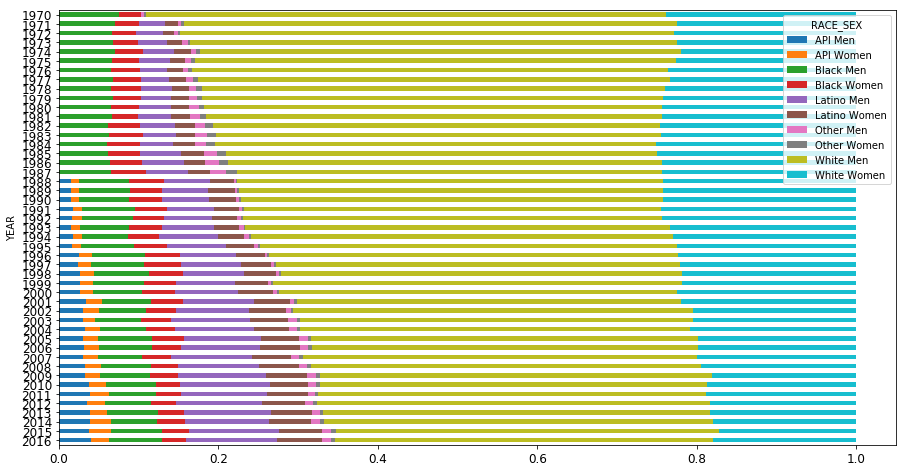

In [9]:
racial_distribution_within_production = calc.distribution(manufacturing_production_workers.groupby(['YEAR']),'RACE_SEX')
racial_distribution_within_production.plot(kind='barh', stacked=True, figsize=(15, 8), fontsize=12, rot=0)
plt.gca().invert_yaxis()

White men have always had the largest share of manufacturing/production work and that has decreased over time.

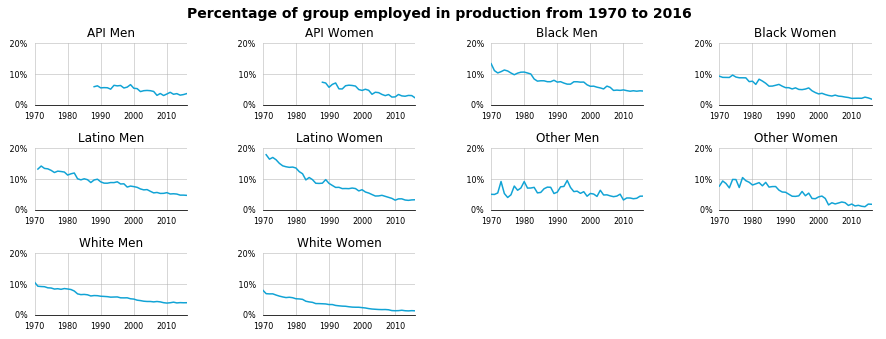

In [10]:
racial_distribution_across_jobs = calc.distribution(workers.groupby(['YEAR', 'RACE_SEX']),'OCC_2010_GROUP')
production_race_distribution = racial_distribution_across_jobs[24].to_frame().unstack()
production_race_distribution.columns = production_race_distribution.columns.droplevel()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 5))

# loop through all the plots
axes_list = [item for sublist in axes for item in sublist] 

for n in range(10):
    ax = axes_list.pop(0)
    production_race_distribution[production_race_distribution.columns[n]].plot( ax=ax, legend=None, color='#11a3d5' )
    ax.set_xticks( np.arange(1970, 2017, 10) )                          
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(linewidth=0.5)
    ax.set_ylim(ymin=0, ymax=.4) # Set ylimit to 40%
    ax.xaxis.label.set_visible(False) # Hide 'YEAR' label
    ax.set_yticklabels(['{:3.0f}%'.format(n*100) for n in ax.get_yticks()]) # format y-axis as percent
    ax.set_title(production_race_distribution.columns[n])

# we don't have enough data to plot the last 2 squares, so hide them
axes[-1, -1].axis('off')
axes[-1, -2].axis('off')

# add title
fig.suptitle('Percentage of group employed in production from 1970 to 2016', fontsize=14, fontweight='bold')

# give a little breathing room between plots
plt.subplots_adjust(wspace=.5, hspace=0.7)

plt.show(fig)

But these charts show that black and Latino workers have worked at disproportionately higher rates than white workers.

"Nearly all those production workers — 93 percent — never went to college."

In [11]:
calc.distribution(workers.query('OCC_2010_GROUP == 24').groupby(['YEAR']), 'COLLEGE').head()

COLLEGE,C,N
YEAR,,
1970,0.071075,0.928925
1971,0.073075,0.926925
1972,0.081084,0.918916
1973,0.094987,0.905013
1974,0.099010,0.900990


In [12]:
production_workers = workers.query('OCC_2010_GROUP == 24')
production_workers_no_college = calc.count(production_workers.groupby(['YEAR', 'COLLEGE'])).round(0)
production_workers_no_college.head(1)

COLLEGE,C,N
YEAR,,
1970,1012393.0,13231637.0


In [13]:
production_workers_no_college.tail(1)

COLLEGE,C,N
YEAR,,
2016,3297691.0,5296948.0


---

How I got the numbers for this chart:

![Image of cluster chart](https://cdn.vox-cdn.com/uploads/chorus_asset/file/8765535/charts_manuf2.png)

In [14]:
chart_clusters = calc.count(production_workers.groupby(['YEAR', 'COLLEGE', 'QUINTILE'])).round(0)

In [15]:
chart_clusters.head(2)

QUINTILE              1          2          3          4          5
YEAR COLLEGE                                                       
1970 C         111697.0   145433.0   155126.0   283754.0   316383.0
     N        1596211.0  3140755.0  3189970.0  3272044.0  2032657.0

In [16]:
chart_clusters.tail(2)

QUINTILE             1          2          3         4         5
YEAR COLLEGE                                                    
2016 C        455381.0   738638.0   816657.0  788692.0  498322.0
     N        965635.0  1805777.0  1404657.0  830522.0  290356.0

---

"Today there’s been a small shift in how many of those workers earn good wages..."

In [17]:
wage_distribution = calc.distribution(production_workers.groupby(['YEAR']), 'QUINTILE')
wage_distribution.head()

QUINTILE,1,2,3,4,5
YEAR,,,,,
1970,0.119903,0.230706,0.234842,0.249634,0.164914
1971,0.119886,0.244216,0.256292,0.245421,0.134185
1972,0.120984,0.243878,0.237136,0.238671,0.159330
1973,0.140171,0.245898,0.213205,0.242368,0.158358
1974,0.130767,0.240886,0.215739,0.265226,0.147381


In [18]:
wage_distribution.tail()

QUINTILE,1,2,3,4,5
YEAR,,,,,
2012,0.163138,0.263277,0.271612,0.204583,0.097390
2013,0.147794,0.272427,0.265455,0.224878,0.089446
2014,0.160489,0.269052,0.261550,0.213577,0.095331
2015,0.162465,0.269735,0.260218,0.211274,0.096308
2016,0.165338,0.296047,0.258454,0.188398,0.091764


"... but the bigger problem is that there are far fewer jobs. The manufacturing industry now employs 11 percent of all workers, and only 6 percent of workers are in production."

In [19]:
calc.count(production_workers.groupby(['YEAR', 'QUINTILE'])).round(0)

QUINTILE,1,2,3,4,5
YEAR,,,,,
1970,1707908.0,3286188.0,3345096.0,3555798.0,2349040.0
1971,1544663.0,3146593.0,3302185.0,3162124.0,1728908.0
1972,1582128.0,3189230.0,3101066.0,3121135.0,2083586.0
1973,1882216.0,3301919.0,2862911.0,3254509.0,2126429.0
1974,1761648.0,3245136.0,2906367.0,3573032.0,1985468.0
1975,1684971.0,2924549.0,3098577.0,3277026.0,2225571.0
1976,1795746.0,2898903.0,3265323.0,3056436.0,2354093.0
1977,1752889.0,3191143.0,3055380.0,3267237.0,2495983.0
1978,1790937.0,3029602.0,3339980.0,3300549.0,2628567.0


---

![Image of bar chart](https://cdn.vox-cdn.com/uploads/chorus_asset/file/8787167/charts_increase2.png)

For the chart above, I based the bar charts on the following info:

> "Production occupations are one of two major occupational groups that is projected to decline. Employment is projected to decline 3 percent, with a loss of about 282,100 jobs from 2014 to 2024." [source](https://www.bls.gov/ooh/production/home.htm) 

The BLS estimation of production jobs in this projection was 282100/3%, or 9.4 million jobs.

> "Employment of healthcare occupations is projected to grow 19 percent from 2014 to 2024, much faster than the average for all occupations, adding about 2.3 million new jobs." [source](https://www.bls.gov/ooh/healthcare/)

The BLS estimation of health jobs in this projection was 2300000/19%, or 12.1 million jobs.

"There are at least 3.6 million direct care workers in the US"

The IPUMS survey we're using doesn't disambiguate between home health aides, nursing aides, and pyschiatric aides, so let's turn to the [OES](https://www.bls.gov/cew/datatoc.htm) to see what's up. I chose the most recent year, 2016, and picked out these rows (detailed occupation):


occ title | tot_emp | emp_prse | h_mean |  a_mean  | mean_prse | h_pct10 | h_pct25 | h_median | h_pct75 | h_pct90 |  a_pct10  |  a_pct25  |  a_median  |  a_pct75  |  a_pct90 
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Personal Care Aides | 1,492,250 | 0.8 | 10.92 | 22,710 | 0.3 | 8.32 | 9.22 | 10.54 | 11.95 | 14.31 | 17,310 | 19,180 | 21,920 | 24,860 | 29,760
Nursing Assistants | 1,312,400 | 0.6 | 13.16 | 27,380 | 0.3 | 9.62 | 10.75 | 12.65 | 14.91 | 18.03 | 20,010 | 22,360 | 26,320 | 31,020 | 37,510
Home Health Aides | 796,210 | 1.2 | 11.30 | 23,500 | 0.5 | 8.65 | 9.56 | 10.85 | 12.34 | 14.65 | 18,000 | 19,880 | 22,570 | 25,660 | 30,470
Cooks, Fast Food | 512,530 | 1.8 | 9.89 | 20,570 | 0.4 | 8.10 | 8.72 | 9.54 | 10.83 | 12.15 | 16,850 | 18,140 | 19,850 | 22,520 | 25,280
Combined Food Preparation and Serving Workers, Including Fast Food | 3,251,140 | 0.6 | 9.74 | 20,260 | 0.2 | 8.07 | 8.65 | 9.31 | 10.51 | 11.96 | 16,790 | 17,990 | 19,370 | 21,860 | 24,870

In [20]:
print(comma_format(1492250 + 1312400 + 796210))

3,600,860


![Image of cluster chart](https://cdn.vox-cdn.com/uploads/chorus_asset/file/8768227/charts_deciles.png)



Chart on fast food workers, personal care aides, home health aides, nursing assistants, LPN, and registered nurses divided into wage deciles

OCC2010 | Description
--- | --- 
3130 | Nurses
4610 | Personal care aides
3600 | Nursing, Psychiatric, and Home Health Aides
4050 | Combined Food Preparation and Serving Workers, Including Fast Food

In [21]:
workers_2016 = workers.query('YEAR == 2016')
subset_workers_2016 = workers_2016.query('OCC2010 == 3130 or OCC2010 == 4610 or OCC2010 == 3600 or OCC2010 == 4050')
jobs_by_decile_2016 = calc.count(subset_workers_2016.groupby(['OCC2010', 'DECILE'])).round(0)
jobs_by_decile_2016

DECILE,1,2,3,4,5,6,7,8,9,10
OCC2010,,,,,,,,,,
3130,76356.0,90167.0,99535.0,173787.0,164170.0,339516.0,508640.0,744783.0,782309.0,275173.0
3600,297943.0,329421.0,537538.0,458543.0,173658.0,161821.0,45784.0,22526.0,13562.0,15272.0
4050,190848.0,112445.0,49664.0,43858.0,11588.0,10226.0,1943.0,NaN,NaN,NaN
4610,265205.0,297661.0,253549.0,236460.0,68769.0,95926.0,36407.0,19784.0,13931.0,6475.0


"One in 10 working black women are employed in direct care; more than a quarter of direct care workers are black women. In contrast, while white women make up 35 percent of these jobs, only one in 37 working white women is employed in direct care. Latina women, as well as immigrant women, are also disproportionately represented. "

In [22]:
# This shows all full and part-time workers

def health(row):
    occ = row['OCC2010']
    # 3600 Nursing, psychiatric, and home health aides
    # 4610 Personal and home care aides
    if occ == 3600 or occ == 4610: return 'Health'
    else: return 'Other'

workers_2016 = workers_2016.assign(DC = workers_2016.apply(health, axis=1))
calc.distribution(workers_2016.groupby(['RACE_SEX']), 'DC')

DC,Health,Other
RACE_SEX,,
API Men,0.014287,0.985713
API Women,0.049045,0.950955
Black Men,0.015349,0.984651
Black Women,0.104142,0.895858
Latino Men,0.004489,0.995511
Latino Women,0.049018,0.950982
Other Men,0.014796,0.985204
Other Women,0.059544,0.940456
White Men,0.003573,0.996427


In [23]:
calc.distribution(workers_2016.query('DC == "Health"'), 'RACE_SEX')

RACE_SEX
API Men         0.020025
API Women       0.060494
Black Men       0.035215
Black Women     0.277420
Latino Men      0.018144
Latino Women    0.149757
Other Men       0.005989
Other Women     0.026857
White Men       0.052066
White Women     0.354035
Name: WTSUPP, dtype: float64

In [24]:
ft_workers_2016 = workers_2016.query('FULLPART == 1')
calc.distribution(ft_workers_2016.groupby(['RACE_SEX']), 'DC')

DC,Health,Other
RACE_SEX,,
API Men,0.012813,0.987187
API Women,0.042488,0.957512
Black Men,0.015470,0.984530
Black Women,0.096175,0.903825
Latino Men,0.003127,0.996873
Latino Women,0.044028,0.955972
Other Men,0.015511,0.984489
Other Women,0.056976,0.943024
White Men,0.002682,0.997318


In [25]:
calc.distribution(ft_workers_2016.query('DC == "Health"'), 'RACE_SEX')

RACE_SEX
API Men         0.023432
API Women       0.060273
Black Men       0.043649
Black Women     0.292518
Latino Men      0.016109
Latino Women    0.144130
Other Men       0.007396
Other Women     0.027533
White Men       0.049600
White Women     0.335361
Name: WTSUPP, dtype: float64

For all workers (full time and part time):
- 10.4 percent of working black women (1 in 10) made up 27.7 percent of the direct care workforce.
- 2.7 percent of working white women (1 in 37) made up 35 percent of the direct care workforce.

For just full-time workers:
- 9.6 percent of working black women make up 29.3 percent of the full-time direct care workforce.
- 2.3 percent of working white women make up 33.5 percent of the full-time direct care workforce.

It doesn't really matter which stats I use — they're both indicative of a race gap in direct care.

In [26]:
calc.count(workers_2016.groupby(['RACE_SEX', 'DC'])).round(0)

DC,Health,Other
RACE_SEX,,
API Men,67087.0,4628708.0
API Women,202668.0,3929583.0
Black Men,117978.0,7568264.0
Black Women,929421.0,7995167.0
Latino Men,60785.0,13481605.0
Latino Women,501722.0,9733711.0
Other Men,20063.0,1335900.0
Other Women,89976.0,1421122.0
White Men,174435.0,48642339.0


"Women make up 86 percent of the full-time direct care workforce but are typically out-earned by men doing the same work."

In [27]:
calc.distribution(ft_workers_2016.query('DC == "Health"'), 'SEX')

SEX
1    0.140185
2    0.859815
Name: WTSUPP, dtype: float64

In [28]:
# Median wages by gender
calc.median(ft_workers_2016.query('DC == "Health"').groupby(['SEX']), 'INCOME_2015').round(0)

SEX
1    30159.0
2    24127.0
dtype: float64